# 研究主題：西北太平洋颱風之相關數據分析
## 研究者：黃湘雯

## 本研究分析流程為：
### 經由中華民國中央氣象局提供之颱風資料庫裡的西北太平洋颱風列表，我們可以得知 颱風年份,編號,中文名稱,英文名稱,颱風生命期間,颱風生命期間,中心最低氣壓(hPa),中心最大風速(m/s),最大7級風暴風半徑(km),最大10級風暴風半徑(km),警報發布報數等相關數據資料
### 而後我們預期可以將其數據整理並分析之,以下將有圖表形式輔助讀者閱讀與分析之討論,並且做出結論,經由數據分析,我們預期可以得知上述數據中隱含之訊息與歸納出對於此議題之可能未來趨勢


### 在此附上分析資料來源 [研究颱風資料之原始網址](http://rdc28.cwb.gov.tw/TDB/ntdb/pageControl/typhoon) 

## 1. 將網頁資料post之table資料，利用pandas套件整理並存取為csv檔案，可方便之後進行數據分析之來源

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import csv
url = 'http://rdc28.cwb.gov.tw/TDB/ctrl_typhoon_list/get_typhoon_list_table/'

payload = {"year":'all',
           "model":'all'}
res = requests.post(url, data=payload)
soup=BeautifulSoup(res.text, "lxml")
df = pd.read_html(res.text)

#print(df)
#next(df)
#print(df)
df[0].to_csv('out2.csv',encoding='utf_8_sig')


## 2.統計不同年份 西北太平洋發生颱風之頻率，可分析颱風發生頻率趨勢

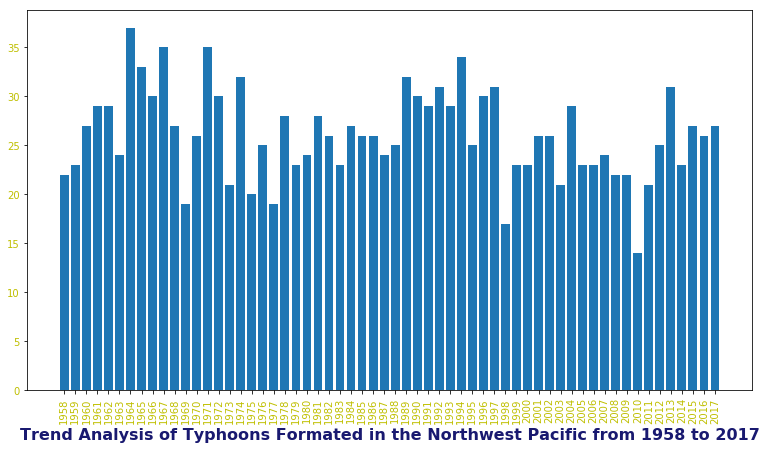

In [4]:
import matplotlib.pyplot as plt
import csv
import numpy as np

with open ('out2.csv','r',encoding='utf-8') as f:
    reader=csv.reader(f)
    for i in range(3):
        next(reader)
    #reader = reader.iloc[::-1]

    column_origin_year = [row[1] for row in reader]
    column_final_year=[]
    for i in range (0,len(column_origin_year)):
        column_final_year.append(int(column_origin_year[i])) #颱風發生年份
    #print(column_final_year) #list int

    
    #統計年份形成颱風次數=======================================================================
    
    table1_year=[]
    table1_account=[]
    for i in range(1958,2018):
        year_count=0
        for j in range (0,len(column_final_year)):           
            if column_final_year[j]==i:
                year_count+=1
        #print(i,"年份",year_count,"次")
        table1_year.append(i)
        table1_account.append(year_count)

    #統計年份形成颱風次數======繪製長條圖=====================================================   
    plt.figure(figsize=(13, 7)) 
    y_pos = np.arange(len(table1_year))
    plt.bar(y_pos, table1_account)
    plt.xticks(y_pos,table1_year, color='y',rotation=90)
    plt.yticks(color='y')
    plt.xlabel('Trend Analysis of Typhoons Formated in the Northwest Pacific from 1958 to 2017', fontweight='bold', color = 'midnightblue', fontsize='16')
    plt.show()

## 分析之想法流程與說明：

### 欲進行分析最初，我們預期可以將西北太平洋颱風年份當作時間趨勢，分析颱風發生之頻率(單位：次數/年)，依照年份與找出是否因為時間的推移，而有上升或下降之趨勢。
### 將西北太平洋發生颱風之次數記錄下來當作圖表y軸,每一年為x軸
繪製長條圖可以更清楚找出不同年份發生颱風的極端值，例如1968年,1972年...2010年特別為發生颱風次數少之年份,相對的,1964年,1971年,1994年...等為發生颱風次數較少之年份。也可以看出隨著時間的推移,發生颱風之次數可能波動,但此圖表可以讀出之訊息並不足以表示長期來看之演變趨勢,故我們可以再將數據時間軸拉大一點來探討之。
#### (註) 因2018年尚未結束,故考量到若將未結束之年份加進分析,將使分析趨勢不準確，故忽略2018年之數據

## 3. 統計10年份為單位 西北太平洋發生颱風之頻率，可分析颱風發生頻率趨勢

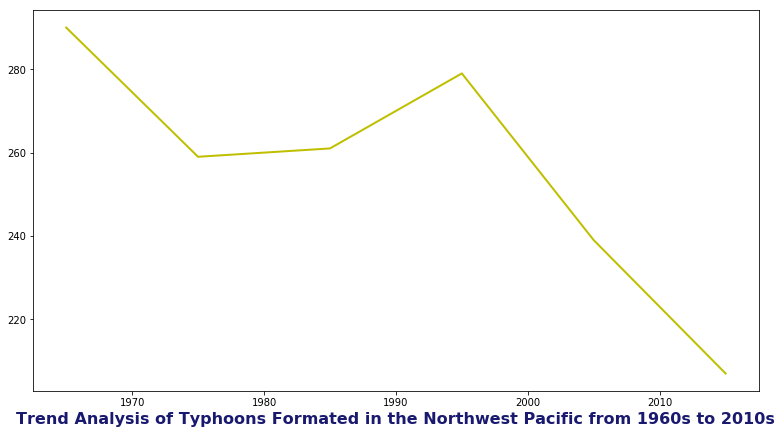

In [5]:
import matplotlib.pyplot as plt
import csv
import numpy as np

with open ('out2.csv','r',encoding='utf-8') as f:
    reader=csv.reader(f)
    for i in range(3):
        next(reader)
    #reader = reader.iloc[::-1]

    column_origin_year = [row[1] for row in reader]
    column_final_year=[]
    for i in range (0,len(column_origin_year)):
        column_final_year.append(int(column_origin_year[i])) #颱風發生年份
    #print(column_final_year) #list int


    table1_year_t=[]
    table1_account_t=[]
    for i in range(1960,2020,10):
        year_count_t=0
        for j in range (0,len(column_final_year)):           
            if i<=column_final_year[j]<=i+9:
                year_count_t+=1
        #print(i,"年份",year_count_t,"次")
        table1_year_t.append(i+5)
        table1_account_t.append(year_count_t)

    plt.figure(figsize=(13, 7)) 
    y_pos = np.arange(len(table1_year_t))

    plt.plot(table1_year_t , table1_account_t, color='y', linewidth=2.0, linestyle='-')
    #plt.fill_between( table1_year_t, table1_account_t, color="y", alpha=0.2)

    plt.xlabel('Trend Analysis of Typhoons Formated in the Northwest Pacific from 1960s to 2010s', fontweight='bold', color = 'midnightblue', fontsize='16')
    plt.show()

### 分析之想法與說明：
### 將年份再依照1960年代～2010年代,每十年為一單位,繪製成折線圖,能更清楚看出時間與西北太平洋發生颱風之頻率(次數/十年)

圖表可以讀取之訊息為：從1960年代開始,除了1990年代期間微上升,大致上發生颱風之次數每十年有趨於減少之現象,
可能之原因尚且有非常多種可能,如近期氣象之劇烈變異等,但目前並沒有其他數據佐證之,故只能依據圖表之客觀資訊進行推測原因

#### (註) 因部分年份不滿十年,本圖表並不納入1958,1959,2011~2018之年份數據



## 4. 上述皆為西北太平洋發生之颱風數據,那麼台灣呢？
## 分析台灣“有”發佈警報之颱風個數,與每一年發生颱風之次數繪製成長條圖

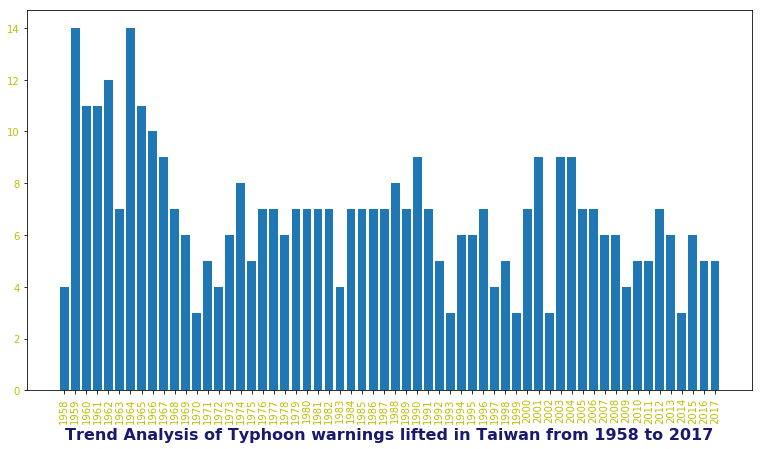

In [7]:
import matplotlib.pyplot as plt
import csv
import numpy as np
with open ('out2.csv','r',encoding='utf-8') as f:
    reader=csv.reader(f)
    for i in range(16):
        next(reader)
    #看最後一行 取台灣有發佈警報的颱風====================================================================
    Taiwan=[]
    for row in reader:
        if row[10]!='---':
            Taiwan.append(row)
    #print(Taiwan)
    year=[]


#找出台灣有發佈警報之年份
    for i in range(0,len(Taiwan)):
        year.append(int(Taiwan[i][1]))
    #print(year)

    table1_year=[]
    table1_account=[]
    for i in range(1958,2018):
        year_count=0
        for j in range (0,len(year)):           
            if year[j]==i:
                year_count+=1
        #print(i,"年份",year_count,"台灣發生次數")
        table1_year.append(i)
        table1_account.append(year_count)

    plt.figure(figsize=(13, 7)) 
    y_pos = np.arange(len(table1_year))
    plt.bar(y_pos, table1_account)

 
    # Create names on the x-axis
    plt.xticks(y_pos,table1_year, color='y',rotation=90)
    plt.yticks(color='y')

    plt.xlabel('Trend Analysis of Typhoon warnings lifted in Taiwan from 1958 to 2017', fontweight='bold', color = 'midnightblue', fontsize='16')
    plt.show()


### 分析之想法與說明：
### 將有紀錄之“發布警報次數”欄位擷取出來,便為有影響台灣的颱風
### 將影響台灣發生颱風之次數記錄下來當作長條圖y軸,每一年為x軸
長條圖之顯示方式可以清楚看出發生次數之極端值,例如1959,1964年為台灣發生颱風最多次的年份,1970,1993,2002,,,2014等則為最少次之年份,並可以看出從1968年開始呈現略為持平的狀態,但若將時間軸拉長來看,將能獲得更多客觀之數據

## 5. 同3 將台灣發布警報之颱風個數每十年變化,繪製折線圖,能清楚看出趨勢

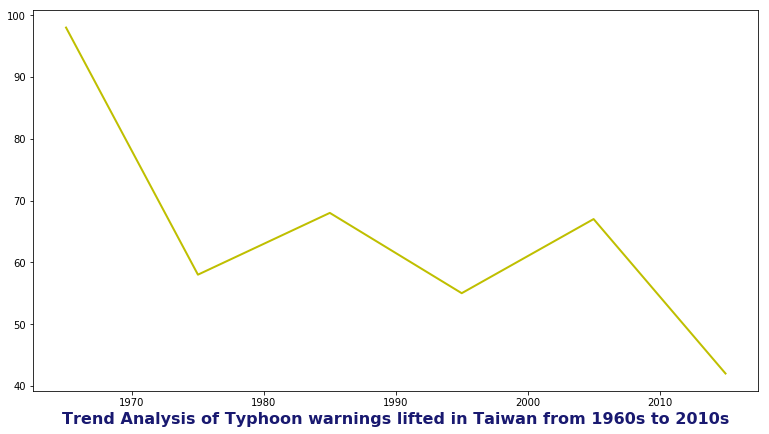

In [9]:
import matplotlib.pyplot as plt
import csv
import numpy as np
with open ('out2.csv','r',encoding='utf-8') as f:
    reader=csv.reader(f)
    for i in range(16):
        next(reader)
    #看最後一行 取台灣有發佈警報的颱風====================================================================
    Taiwan=[]
    for row in reader:
        if row[10]!='---':
            Taiwan.append(row)
    #print(Taiwan)
    year=[]


#找出台灣有發佈警報之年份
    for i in range(0,len(Taiwan)):
        year.append(int(Taiwan[i][1]))
    #print(year)

    table1_year_t=[]
    table1_account_t=[]
    for i in range(1960,2020,10):
        year_count_t=0
        for j in range (0,len(year)):           
            if i<=year[j]<=i+9:
                year_count_t+=1
        #print(i,"年份",year_count_t,"台灣發生次數")
        table1_year_t.append(i+5)
        table1_account_t.append(year_count_t)

    plt.figure(figsize=(13, 7)) 
    y_pos = np.arange(len(table1_year_t))

    plt.plot(table1_year_t , table1_account_t, color='y', linewidth=2.0, linestyle='-')
    #plt.fill_between( table1_year_t, table1_account_t, color="y", alpha=0.2)

    plt.xlabel('Trend Analysis of Typhoon warnings lifted in Taiwan from 1960s to 2010s', fontweight='bold', color = 'midnightblue', fontsize='16')
    plt.show()

## 因x時間軸單位為10年,折線圖可以輔助在長條圖中所展現不出之趨勢
以台灣來說,從1970年代起,發生颱風之次數驟降一年40次左右,而後為些許幅度之波動,甚至2010年又有另一波下降幅度之趨勢

## 6. 進而思考,我們還可以將中心最大風速(m/s) 分類成颱風不同等級,預期不同等級之颱風發生頻率不同

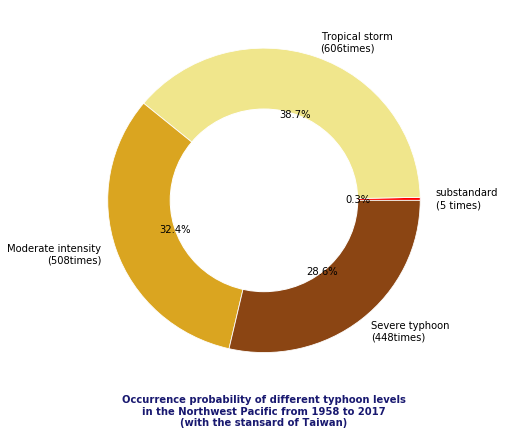

In [13]:

import matplotlib.pyplot as plt
import csv


with open ('out2.csv','r',encoding='utf-8') as f:
    reader=csv.reader(f)
    for i in range(16):
        next(reader)

    #reader = reader.iloc[::-1]

    #取最大風速 進行颱風等級計算發生次數====================================================================
    column_strenth = [row[7] for row in reader]
    #print(column_strenth)
    column_strenth_final=[]
    for i in range (0,len(column_strenth)):
        column_strenth_final.append(int(column_strenth[i])) #颱風中心最大風速
    #print(column_strenth_final) #list int

    not_yet_typhoon=0
    tropical_storm=0
    moderate_intensity=0
    severe_typhoon=0

    for i in range(0,len(column_strenth_final)):
        if column_strenth_final[i]<17.2:
            not_yet_typhoon+=1
        elif 17.2<=column_strenth_final[i]<32.7:
            tropical_storm+=1
        elif 32.7<=column_strenth_final[i]<51.0:
            moderate_intensity+=1
        elif column_strenth_final[i]>=51.0:
            severe_typhoon+=1
    #print("未構成颱風次數",not_yet_typhoon,"輕颱次數",tropical_storm,"中颱次數",moderate_intensity,"強颱次數",severe_typhoon)
    name='substandard\n(5 times)','Tropical storm\n(606times)','Moderate intensity\n(508times)','Severe typhoon\n(448times)'
    typhoon_amount=[not_yet_typhoon,tropical_storm,moderate_intensity,severe_typhoon]

#====================================================================
    plt.figure(figsize=(7,7)) 
    my_circle=plt.Circle( (0,0), 0.6, color='white')
    plt.pie(typhoon_amount, labels=name, colors=['red','khaki','goldenrod','saddlebrown'],wedgeprops = { 'linewidth' : 0.8, 'edgecolor' : 'white' },autopct='%1.1f%%')
    p=plt.gcf()
    plt.xlabel('Occurrence probability of different typhoon levels\nin the Northwest Pacific from 1958 to 2017\n(with the stansard of Taiwan)', fontweight='bold', color = 'midnightblue', fontsize='10')
    p.gca().add_artist(my_circle)
    plt.show()





### 將原始數據轉換成二次數據,圖表中我們得知西北太平洋發生之颱風最多為輕颱,中颱,次為強颱,輕颱與強颱比例差距10%
根據中華民國颱風等級之分類,繪製成百分比之圓餅圖,更能看出發生颱風之不同等級的比例

## 7.同理 分析台灣發布警報之颱風分級之百分比圖

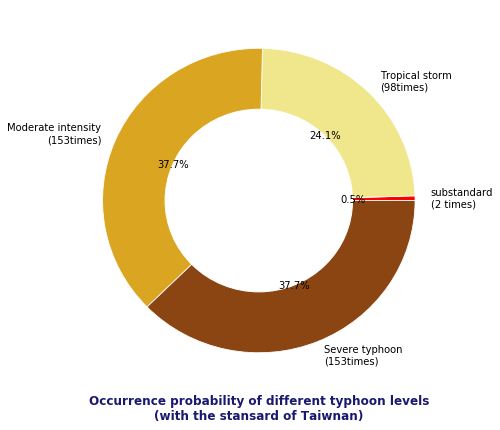

In [14]:
import matplotlib.pyplot as plt
import csv
import numpy as np
with open ('out2.csv','r',encoding='utf-8') as f:
    reader=csv.reader(f)
    for i in range(16):
        next(reader)
    #看最後一行 取台灣有發佈警報的颱風====================================================================
    Taiwan=[]
    for row in reader:
        if row[10]!='---':
            Taiwan.append(row)

    Taiwan_wind=[]
    #print(Taiwan)
    for i in range(0,len(Taiwan)):
        Taiwan_wind.append(int(Taiwan[i][7]))
  
    #print(Taiwan_wind)

    not_yet_typhoon=0
    tropical_storm=0
    moderate_intensity=0
    severe_typhoon=0

    for i in range(0,len(Taiwan_wind)):
        if Taiwan_wind[i]<17.2:
            not_yet_typhoon+=1
        elif 17.2<=Taiwan_wind[i]<32.7:
            tropical_storm+=1
        elif 32.7<=Taiwan_wind[i]<51.0:
            moderate_intensity+=1
        elif Taiwan_wind[i]>=51.0:
            severe_typhoon+=1
    #print("未構成颱風次數",not_yet_typhoon,"輕颱次數",tropical_storm,"中颱次數",moderate_intensity,"強颱次數",severe_typhoon)
    name='substandard\n(2 times)','Tropical storm\n(98times)','Moderate intensity\n(153times)','Severe typhoon\n(153times)'
    typhoon_amount=[not_yet_typhoon,tropical_storm,moderate_intensity,severe_typhoon]
    plt.figure(figsize=(7,7)) 
    my_circle=plt.Circle( (0,0), 0.6, color='white')
    plt.pie(typhoon_amount, labels=name, colors=['red','khaki','goldenrod','saddlebrown'],wedgeprops = { 'linewidth' : 0.8, 'edgecolor' : 'white' },autopct='%1.1f%%')
    p=plt.gcf()
    plt.xlabel('Occurrence probability of different typhoon levels\n(with the stansard of Taiwnan)', fontweight='bold', color = 'midnightblue', fontsize='12')
    p.gca().add_artist(my_circle)
    plt.show()


### 將原始數據轉換成二次數據,圖表中我們得知以台灣來說,有發過警報之颱風等級,最多為中颱與強颱,而後為輕颱,差距在7%左右
根據中華民國颱風等級之分類,繪製成百分比之圓餅圖,更能看出發生颱風之不同等級的比例

total次數 372


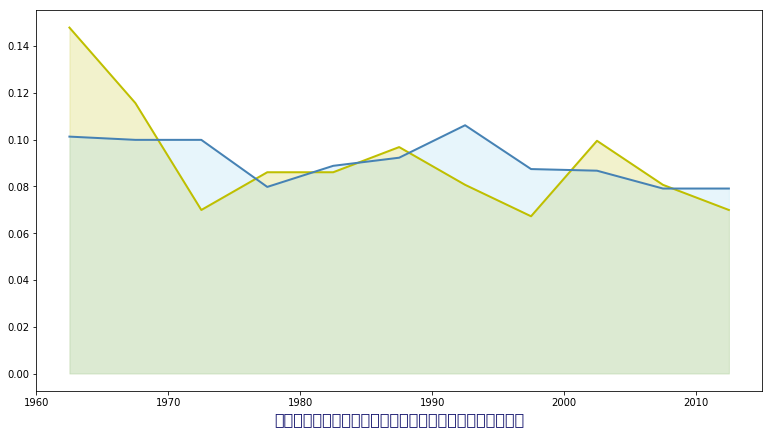

In [20]:
import matplotlib.pyplot as plt
import csv
import numpy as np



with open ('out2.csv','r',encoding='utf-8') as f:
    reader=csv.reader(f)
    for i in range(3):
        next(reader)
    #reader = reader.iloc[::-1]

    column_origin_year = [row[1] for row in reader]
    column_final_year=[]
    for i in range (0,len(column_origin_year)):
        column_final_year.append(int(column_origin_year[i])) #颱風發生年份
    #print(column_final_year) #list int

    
    #統計年份形成颱風次數=======================================================================
    
    table1_year=[]
    table0_account=[]
    for i in range(1960,2015,5):
        year_count=0
        for j in range (0,len(column_final_year)):           
            if i<=column_final_year[j]<=i+4:
                year_count+=1
        #print(i,"五年區間",year_count,"次")
        table1_year.append(i+2.5)
        table0_account.append(year_count)


    #統計年份(以五年為單位)形成颱風次數======繪製折線圖===================================================== 
#======================================================換算成百分比 可以跟有在台灣發警報做比對
    total=0
    for i in range (0,len(table0_account)):
        total+=table0_account[i]
    #print("total次數",total)
    table1_account=[]
    for i in range (0,len(table0_account)):

        table1_account.append(table0_account[i]/total)  
'''

    plt.figure(figsize=(13, 7)) 
    y_pos = np.arange(len(table1_year))

    plt.plot(table1_year , table1_account, color='steelblue', linewidth=2.0, linestyle='-')
    plt.fill_between( table1_year, table1_account, color="skyblue", alpha=0.2)

    plt.xlabel('Trend Analysis of Typhoons Formated in the Northwest Pacific from 1960 to 2015\n(each 5 years)', fontweight='bold', color = 'midnightblue', fontsize='16')
    plt.show()
    '''
    #=======================
    #=======================
with open ('out2.csv','r',encoding='utf-8') as f:
    reader=csv.reader(f)    
    for i in range(16):
        next(reader)

    Taiwan=[]
    for row in reader:
        if row[10]!='---':
            Taiwan.append(row)
    #print(Taiwan)
    year=[]


#找出台灣有發佈警報之年份
    for i in range(0,len(Taiwan)):
        year.append(int(Taiwan[i][1]))
    #print(year)

    table1_year_t=[]
    table0_account_t=[]
    for i in range(1960,2015,5):
        year_count_t=0
        for j in range (0,len(year)):           
            if i<=year[j]<=i+4:
                year_count_t+=1
        #print(i,"五年區間",year_count_t,"台灣發生次數")
        table1_year_t.append(i+2.5)
        table0_account_t.append(year_count_t)
#======================================================換算成百分比 可以跟沒有在台灣發警報做比對
    total_t=0
    for i in range (0,len(table0_account_t)):
        total_t+=table0_account_t[i]
    print("total次數",total_t)
    table1_account_t=[]
    for i in range (0,len(table0_account_t)):

        table1_account_t.append(table0_account_t[i]/total_t)


    plt.figure(figsize=(13, 7)) 
    y_pos = np.arange(len(table1_year))

    plt.plot(table1_year_t , table1_account_t, color='y', linewidth=2.0, linestyle='-')
    plt.fill_between( table1_year_t, table1_account_t, color="y", alpha=0.2)
    plt.plot(table1_year , table1_account, color='steelblue', linewidth=2.0, linestyle='-')
    plt.fill_between( table1_year, table1_account, color="skyblue", alpha=0.2)
    plt.xlabel('西北太平洋颱風總數與台灣颱風總數發生機率隨時間演變圖', fontweight='bold', color = 'midnightblue', fontsize='16')
    plt.show()
    
    

## 最後綜合之圖表 可以看出隨時間推移,西北太平洋發生颱風總次數(藍色),台灣有發過警報之颱風總次數(綠色),佔總數之機率分佈

透過此圖表,我們可以得知更深層的意義為在不同年份(以五年為單位),西北太平洋發生之總次數佔整體機率(藍色),有影響台灣已發布警報之次數佔總影響台灣颱風個數之比例分布差異,或許可以推斷 有影響台灣的颱風次數隨時間演進之機率可能為整個西北太平洋之機率之預測趨勢,若台灣發生有影響力之颱風越來越頻繁,則再過3~4年,即可預測整個西北太平洋之發生頻率也將越來越頻繁。